In [1]:
import json
import os
import matplotlib.pyplot as plt
import glob
import PIL

In [2]:
cell_types_li = ['basophil',
 'eosinophil',
 'erythroblast',
 'garbage',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

In [3]:
with open('/home/colin/new_test/wbc_class_218p5mje_v2.json') as fp:
    wbc_data = json.load(fp)

In [6]:
def get_cell(filename):
    data_dir = filename[len('/home/col/'):]
    data_dir = os.path.join('/hddraid5/data/colin/', data_dir)
    return data_dir

In [5]:
filename

'/home/col/covid-data/COVID Research Images/April 28, 2020/April 28 2020/10049306422/10049306422_078.jpg'

In [7]:
# lets randomly sample 12 cells from each category
samples = {cell_type:[] for cell_type in cell_types_li}
for filename, idx in wbc_data.items():
    cell_type = cell_types_li[idx]
    if len(samples[cell_type]) < 24:
        samples[cell_type].append(get_cell(filename))

## Predicted Cell Examples

IndexError: list index out of range

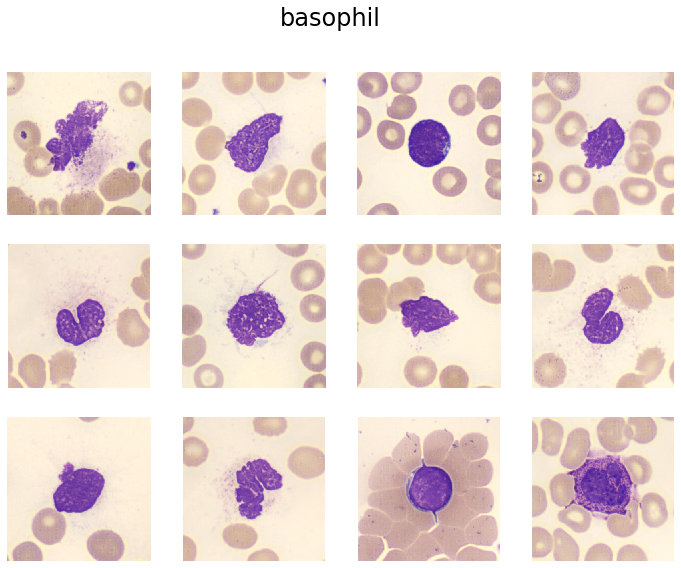

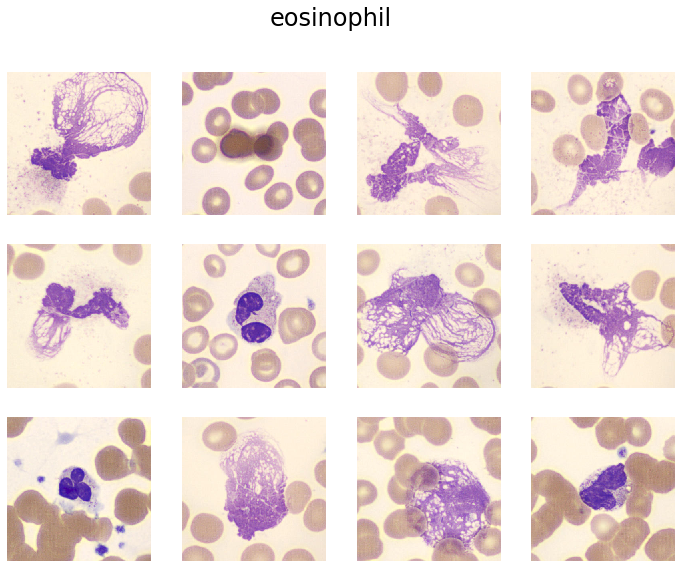

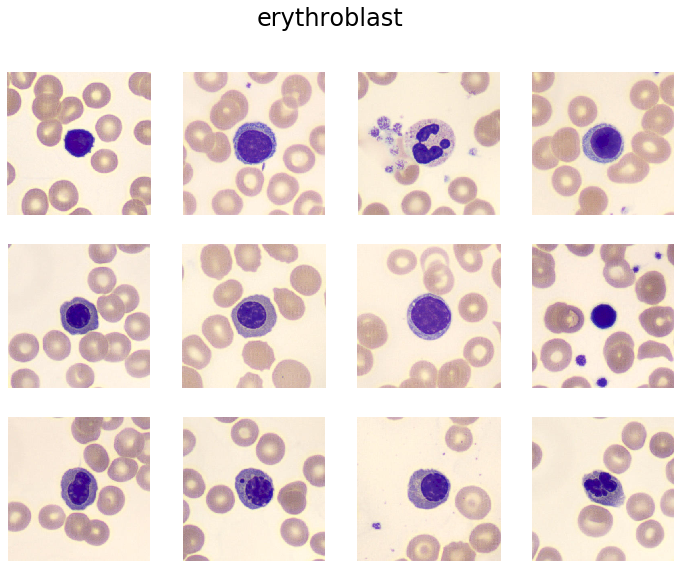

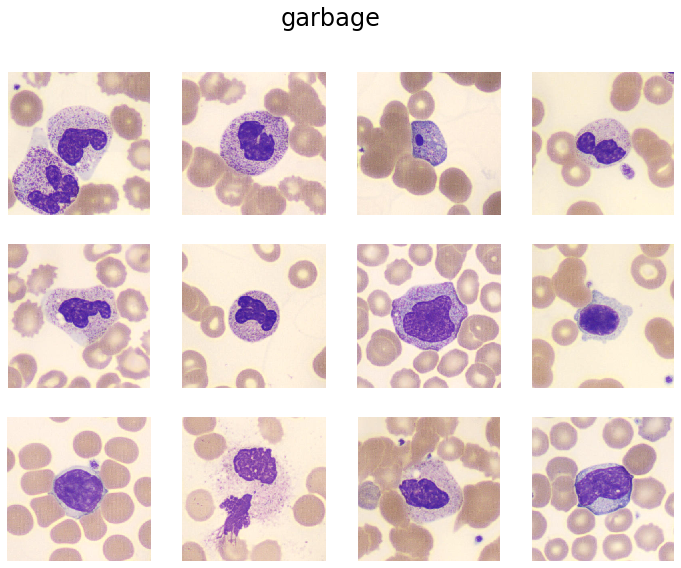

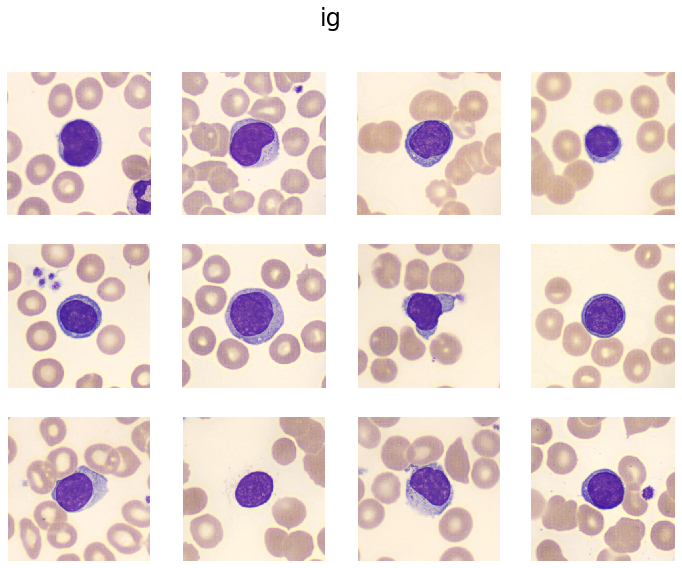

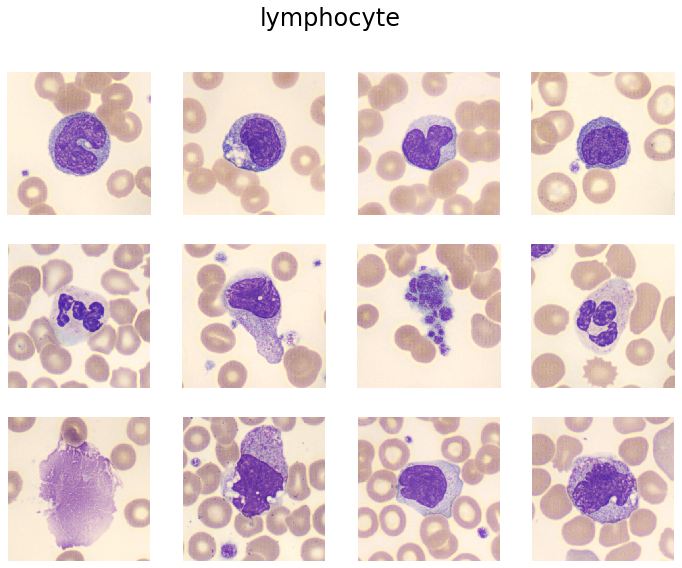

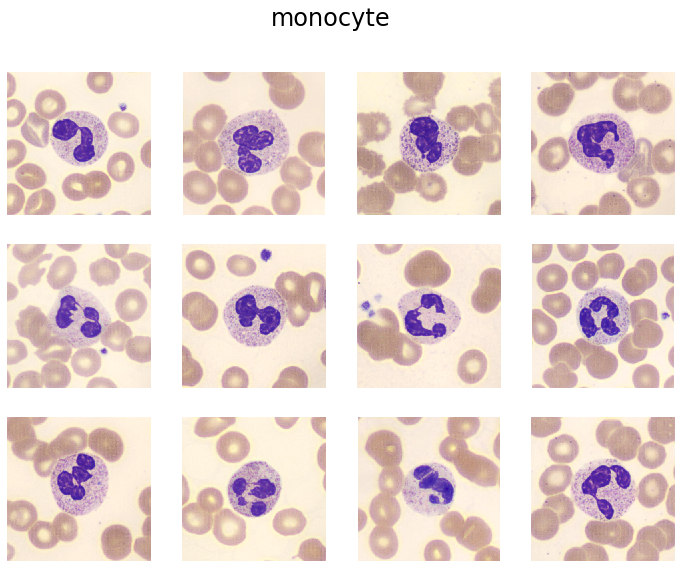

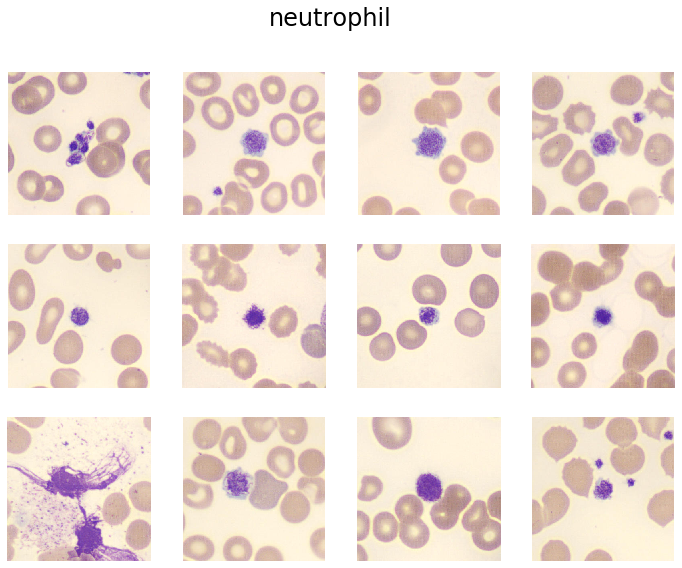

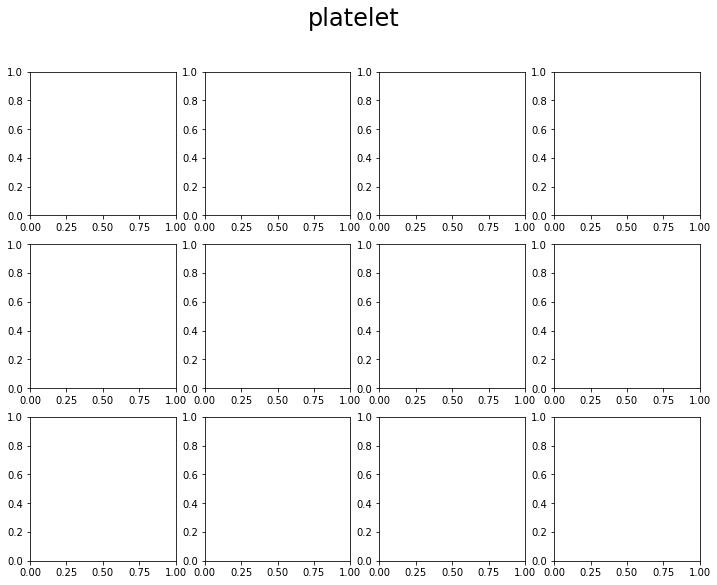

In [8]:
for cell_type, files in samples.items():
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
    fig.suptitle(cell_type, fontsize=24)
    for i in range(3):
        for j in range(4):
            file = samples[cell_type][12 + i*4 + j]
            ax = axs[i,j]
            ax.imshow(PIL.Image.open(file))
            ax.axis('off')
    fig.savefig(f"{cell_type}.png")

## Actual examples of cells

In [7]:
# lets randomly sample 12 cells from each category
sample_gt = {}
for cell_type in cell_types_li:
    sample_gt[cell_type] = glob.glob(f'/hddraid5/data/colin/cell_classification/data/PBC_dataset_normal_DIB/{cell_type}/*.jpg')

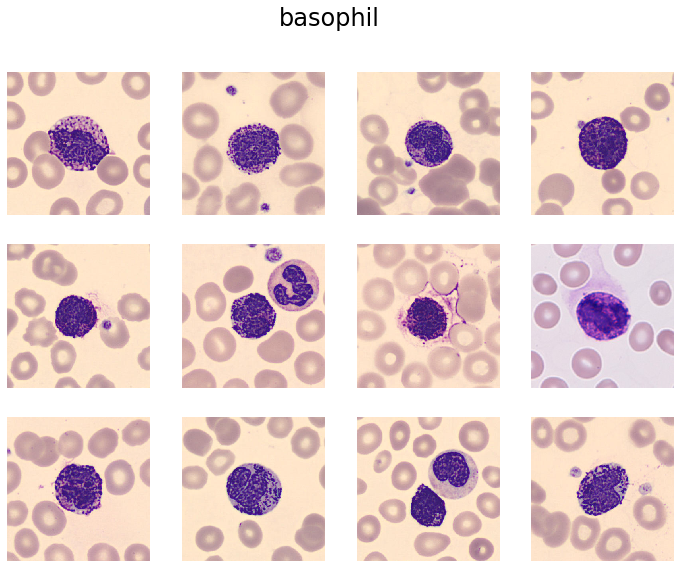

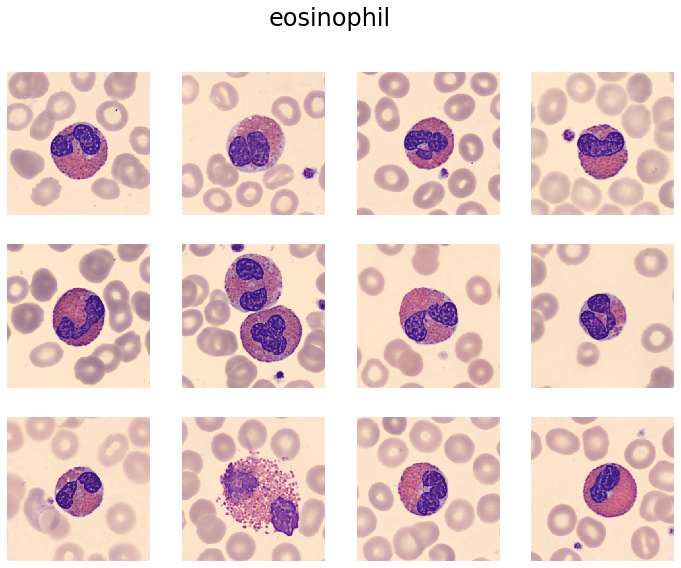

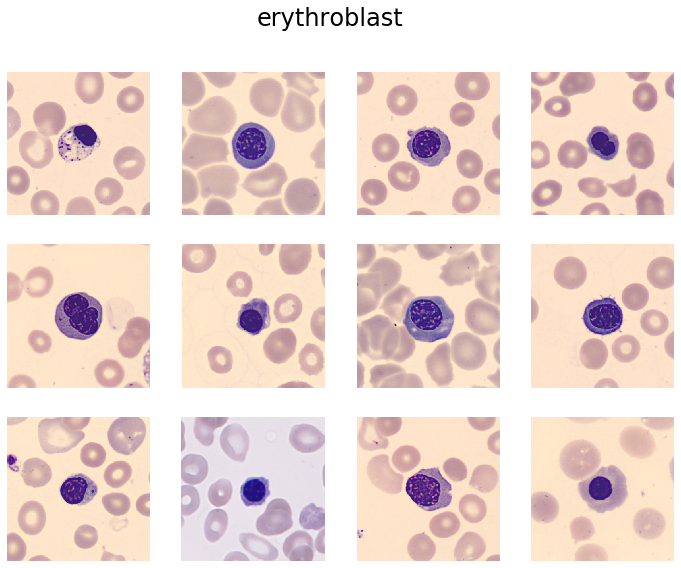

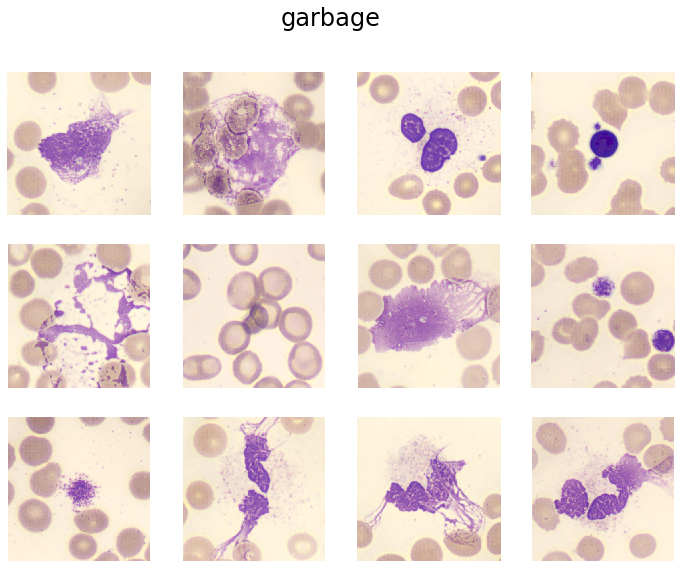

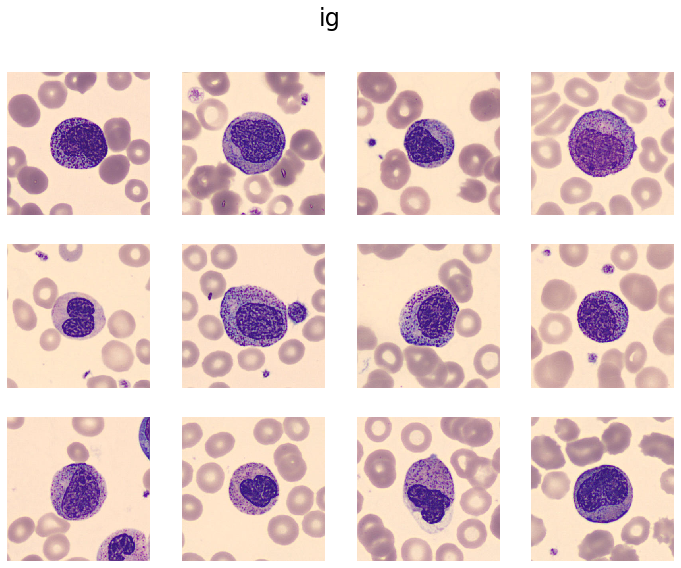

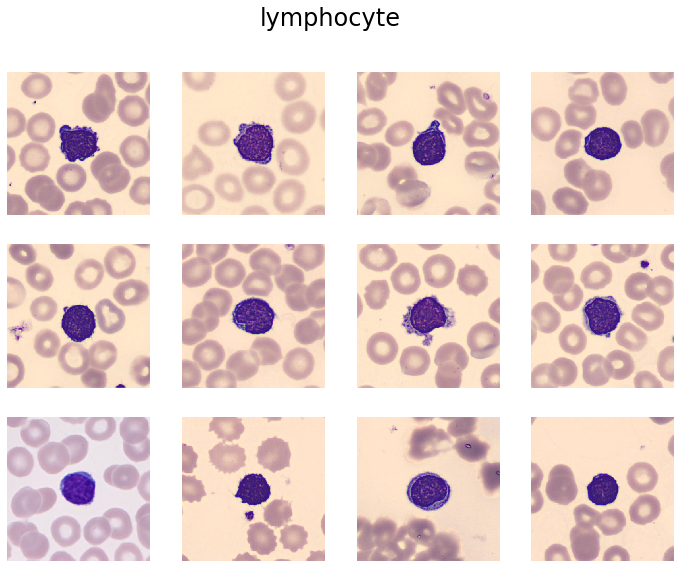

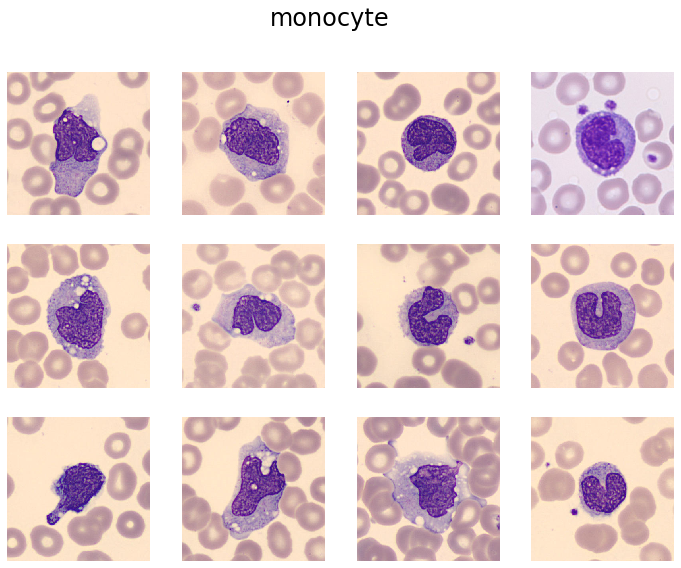

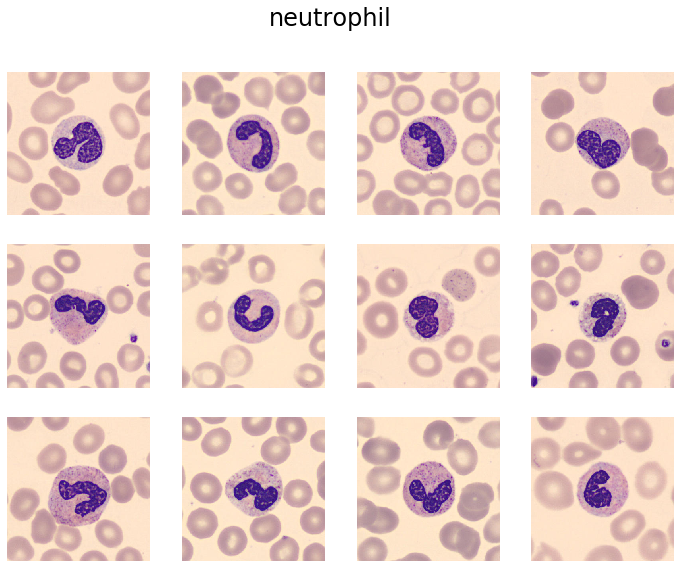

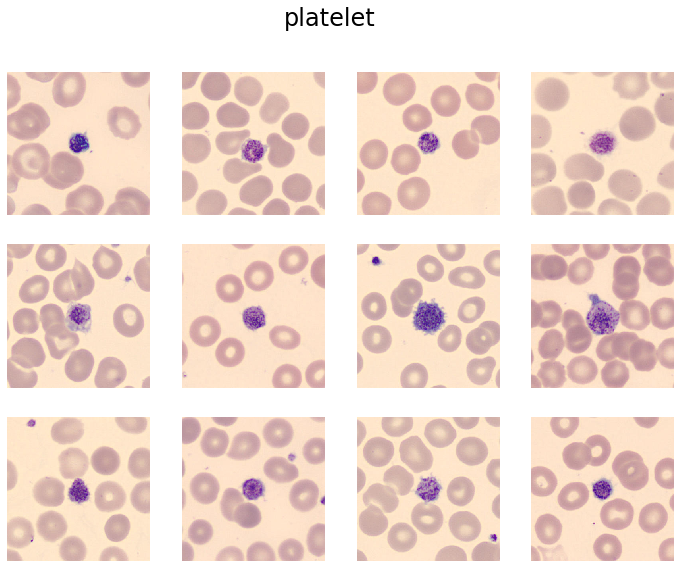

In [9]:
for cell_type, files in sample_gt.items():
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
    fig.suptitle(cell_type, fontsize=24)
    for i in range(3):
        for j in range(4):
            file = sample_gt[cell_type][i*4 + j]
            ax = axs[i,j]
            ax.imshow(PIL.Image.open(file))
            ax.axis('off')
    fig.savefig(f"{cell_type}.png")